# Importing Libraries

In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score

In [567]:
df = pd.read_csv('Frogs_MFCCs.csv',na_values=["?"])
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [568]:
df.shape

(7195, 26)

### Here we have 26 columns, which are 22 attributes, 3 columns of labels and 1 column of Record ID which correspond to 60 audio records, each of which corresponds to one specimen

# 1.a Test and Train Data Separation:  By splitting 70% of the rows randomly as Train Data and the remaining as Test Data

In [569]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, shuffle=True)

In [570]:
test.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2624,1.000000,0.415084,0.405383,0.587831,0.058891,-0.026755,-0.033692,0.086214,0.260815,0.061464,...,0.184129,-0.109200,-0.153145,-0.050650,0.080307,0.138290,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19
6566,0.182893,0.880518,1.000000,0.886650,-0.387802,0.428801,0.191799,-0.336158,0.145164,0.109184,...,-0.217729,-0.205621,0.174822,-0.081133,-0.205227,0.173683,Hylidae,Hypsiboas,HypsiboasCordobae,43
1601,1.000000,0.215078,0.146024,0.527702,0.249055,0.075094,-0.127131,0.053427,0.297588,0.088592,...,0.217542,0.056309,-0.119579,-0.178626,0.027492,0.220232,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
3354,1.000000,0.014037,0.003289,0.489808,0.258137,0.110264,-0.108194,-0.014051,0.230210,0.152573,...,0.237769,0.144371,-0.056745,-0.211772,-0.082778,0.189308,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
2869,1.000000,0.290962,0.155604,0.512464,0.174986,-0.068001,-0.241432,0.000465,0.280409,0.091341,...,0.189429,0.058267,-0.040861,-0.108663,0.026216,0.186630,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,20


In [571]:
test.shape

(2159, 26)

In [572]:
train.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2494,1.0,0.424762,0.356837,0.592257,0.237433,0.076765,-0.103766,0.005138,0.315383,0.037768,...,0.144094,0.022808,-0.133471,-0.129910,0.042323,0.191483,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19
548,1.0,0.493054,0.613072,0.533885,-0.186222,0.016594,0.394709,0.010818,-0.297585,0.100912,...,0.058525,0.079555,-0.120030,-0.030636,0.054704,-0.031715,Leptodactylidae,Adenomera,AdenomeraAndre,8
3417,1.0,0.442064,0.293245,0.726089,0.254030,0.178914,-0.018987,0.023813,0.196568,0.072080,...,0.078837,-0.220545,-0.184062,-0.169232,0.083541,0.176017,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
4137,1.0,0.361556,0.227157,0.537477,0.201919,-0.025676,-0.174175,0.028057,0.304244,0.049381,...,0.183188,0.087206,-0.066263,-0.164585,0.101756,0.257386,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,23
3787,1.0,0.392600,0.331238,0.544056,0.144553,0.062954,-0.067258,-0.060673,0.213612,0.155041,...,0.246351,-0.030860,-0.079079,-0.038339,-0.014148,0.128197,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22


In [573]:
train.shape

(5036, 26)

# 1.b.i Research on Hamming Score/Loss and Exact Match

## Hamming loss: 
### The fraction of the wrong labels to the total Number of labels, i.ewhere is the target and is the prediction. This is a loss function, so the optimal value is zero.
## Hamming score: 
### The closely related hamming score, also called accuracy in the multi-label setting, is defined as the number of correct labels divided by the union of predicted and true labels.
## Exact Match: 
### It is the strictest metric, indicating the  percentage of samples that have all their labels classified correctly.

## Calculating Hamming Score and Exact Match on Different SVM models and seeing how each model performs on this dataset

# Linear SVM

# Family

In [502]:
clf = svm.LinearSVC(penalty='l1',dual=False)
clf.fit(trainX,trainy_family)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [505]:
y_pred_family = clf.predict(testX)

In [506]:
print("Hamming Score:",hamming_loss(testy_family,y_pred_family))

Hamming Score: 0.06021306160259379


In [519]:
print("Exact Match Score:", accuracy_score(testy_family,y_pred_family))

Exact Match Score: 0.9397869383974062


# Genus

In [508]:
clf = svm.LinearSVC(penalty='l1',dual=False)
clf.fit(trainX,trainy_genus)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [509]:
y_pred_genus = clf.predict(testX)

In [510]:
print("Hamming Score:",hamming_loss(testy_genus,y_pred_genus))

Hamming Score: 0.05141269106067624


In [518]:
print("Exact Match Score:", accuracy_score(testy_genus,y_pred_genus))

Exact Match Score: 0.9485873089393237


# Species

In [512]:
clf = svm.LinearSVC(penalty='l1',dual=False)
clf.fit(trainX,trainy_species)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [513]:
y_pred_species = clf.predict(testX)

In [514]:
print("Hamming Score:",hamming_loss(testy_species,y_pred_species))

Hamming Score: 0.04307549791570171


In [517]:
print("Exact Match Score:", accuracy_score(testy_species,y_pred_species))

Exact Match Score: 0.9569245020842982


# RBF Kernel SVM

# Family

In [525]:
svc_family = SVC(kernel='rbf',gamma='scale')
svc_family.fit(trainX,trainy_family)  
y_pred_family = svc_family.predict(testX)
svc_family.score(trainX,trainy_family)
svc_family.score(testX,testy_family)

0.9601667438628995

In [526]:
print("Hamming Score:",hamming_loss(testy_family,y_pred_family))

Hamming Score: 0.03983325613710051


In [527]:
print("Exact Match Score:", accuracy_score(testy_family,y_pred_family))

Exact Match Score: 0.9601667438628995


# Genus

In [528]:
svc_genus = SVC(kernel='rbf',gamma='scale')
svc_genus.fit(trainX,trainy_genus)  
y_pred_genus = svc_genus.predict(testX)
svc_genus.score(trainX,trainy_genus)
svc_genus.score(testX,testy_genus)

0.9541454377026402

In [529]:
print("Hamming Score:",hamming_loss(testy_genus,y_pred_genus))

Hamming Score: 0.04585456229735989


In [530]:
print("Exact Match Score:", accuracy_score(testy_genus,y_pred_genus))

Exact Match Score: 0.9541454377026402


# Species

In [533]:
svc_species = SVC(kernel='rbf',gamma='scale')
svc_species.fit(trainX,trainy_species)  
y_pred_species = svc_species.predict(testX)
svc_species.score(trainX,trainy_species)
svc_species.score(testX,testy_species)

0.9615562760537286

In [534]:
print("Hamming Score:",hamming_loss(testy_species,y_pred_species))

Hamming Score: 0.03844372394627142


In [535]:
print("Exact Match Score:", accuracy_score(testy_species,y_pred_species))

Exact Match Score: 0.9615562760537286


# Poly Kernel

# Family

In [542]:
svc_family = SVC(kernel='poly',gamma='scale')
svc_family.fit(trainX,trainy_family)  
y_pred_family = svc_family.predict(testX)
svc_family.score(trainX,trainy_family)
svc_family.score(testX,testy_family)

0.9342288096340898

In [543]:
print("Hamming Score:",hamming_loss(testy_family,y_pred_family))

Hamming Score: 0.06577119036591014


In [544]:
print("Exact Match Score:", accuracy_score(testy_family,y_pred_family))

Exact Match Score: 0.9342288096340898


# Genus

In [539]:
svc_genus = SVC(kernel='poly',gamma='scale')
svc_genus.fit(trainX,trainy_genus)  
y_pred_genus = svc_genus.predict(testX)
svc_genus.score(trainX,trainy_genus)
svc_genus.score(testX,testy_genus)

0.8962482630847615

In [540]:
print("Hamming Score:",hamming_loss(testy_genus,y_pred_genus))

Hamming Score: 0.10375173691523853


In [541]:
print("Exact Match Score:", accuracy_score(testy_genus,y_pred_genus))

Exact Match Score: 0.8962482630847615


# Species

In [536]:
svc_species = SVC(kernel='poly',gamma='scale')
svc_species.fit(trainX,trainy_species)  
y_pred_species = svc_species.predict(testX)
svc_species.score(trainX,trainy_species)
svc_species.score(testX,testy_species)

0.8855951829550718

In [537]:
print("Hamming Score:",hamming_loss(testy_species,y_pred_species))

Hamming Score: 0.1144048170449282


In [538]:
print("Exact Match Score:", accuracy_score(testy_species,y_pred_species))

Exact Match Score: 0.8855951829550718


# 1.b.ii SVM

## First we need to split the train and test datasets to Xtrain, Xtest and the different Y for each of the labels

In [577]:
#Train_Family
trainy_family = train['Family'].copy()
#trainy_family=pd.DataFrame(trainy_family)
#Test_Family
testy_family = test['Family'].copy()
testy_family=pd.DataFrame(testy_family)

In [578]:
trainy_family.head()

2494    Leptodactylidae
548     Leptodactylidae
3417    Leptodactylidae
4137    Leptodactylidae
3787    Leptodactylidae
Name: Family, dtype: object

In [579]:
testy_family.head()

,Family
2624,Leptodactylidae
6566,Hylidae
1601,Leptodactylidae
3354,Leptodactylidae
2869,Leptodactylidae


In [580]:
#Train_Genus
trainy_genus = train['Genus'].copy()
#trainy_genus=pd.DataFrame(trainy_genus)
#Test_Genus
testy_genus = test['Genus'].copy()
testy_genus=pd.DataFrame(testy_genus)

In [581]:
trainy_genus.head()

2494    Adenomera
548     Adenomera
3417    Adenomera
4137    Adenomera
3787    Adenomera
Name: Genus, dtype: object

In [582]:
testy_genus.head()

,Genus
2624,Adenomera
6566,Hypsiboas
1601,Adenomera
3354,Adenomera
2869,Adenomera


In [583]:
#Train_Species
trainy_species = train['Species'].copy()
#trainy_species=pd.DataFrame(trainy_species)
#Test_Species
testy_species = test['Species'].copy()
testy_species=pd.DataFrame(testy_species)

In [584]:
trainy_species.head()

2494    AdenomeraHylaedactylus
548             AdenomeraAndre
3417    AdenomeraHylaedactylus
4137    AdenomeraHylaedactylus
3787    AdenomeraHylaedactylus
Name: Species, dtype: object

In [585]:
testy_species.head()

,Species
2624,AdenomeraHylaedactylus
6566,HypsiboasCordobae
1601,AdenomeraHylaedactylus
3354,AdenomeraHylaedactylus
2869,AdenomeraHylaedactylus


In [574]:
#Train X
trainX = train.iloc[:,:22]
#Test X
testX = test.iloc[:,:22]

In [575]:
trainX.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2494,1.0,0.424762,0.356837,0.592257,0.237433,0.076765,-0.103766,0.005138,0.315383,0.037768,...,0.390007,-0.072742,-0.241846,0.081086,0.144094,0.022808,-0.133471,-0.129910,0.042323,0.191483
548,1.0,0.493054,0.613072,0.533885,-0.186222,0.016594,0.394709,0.010818,-0.297585,0.100912,...,-0.066861,0.229043,-0.010037,-0.158897,0.058525,0.079555,-0.120030,-0.030636,0.054704,-0.031715
3417,1.0,0.442064,0.293245,0.726089,0.254030,0.178914,-0.018987,0.023813,0.196568,0.072080,...,0.205802,-0.318534,-0.054271,0.315413,0.078837,-0.220545,-0.184062,-0.169232,0.083541,0.176017
4137,1.0,0.361556,0.227157,0.537477,0.201919,-0.025676,-0.174175,0.028057,0.304244,0.049381,...,0.344385,-0.114047,-0.301647,0.038174,0.183188,0.087206,-0.066263,-0.164585,0.101756,0.257386
3787,1.0,0.392600,0.331238,0.544056,0.144553,0.062954,-0.067258,-0.060673,0.213612,0.155041,...,0.374332,0.018702,-0.252099,0.082721,0.246351,-0.030860,-0.079079,-0.038339,-0.014148,0.128197


In [576]:
testX.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2624,1.000000,0.415084,0.405383,0.587831,0.058891,-0.026755,-0.033692,0.086214,0.260815,0.061464,...,0.464075,-0.150962,-0.282574,0.099119,0.184129,-0.109200,-0.153145,-0.050650,0.080307,0.138290
6566,0.182893,0.880518,1.000000,0.886650,-0.387802,0.428801,0.191799,-0.336158,0.145164,0.109184,...,0.150133,-0.337397,0.127166,0.291155,-0.217729,-0.205621,0.174822,-0.081133,-0.205227,0.173683
1601,1.000000,0.215078,0.146024,0.527702,0.249055,0.075094,-0.127131,0.053427,0.297588,0.088592,...,0.376353,-0.085176,-0.273791,0.051538,0.217542,0.056309,-0.119579,-0.178626,0.027492,0.220232
3354,1.000000,0.014037,0.003289,0.489808,0.258137,0.110264,-0.108194,-0.014051,0.230210,0.152573,...,0.276284,-0.011905,-0.279246,-0.048390,0.237769,0.144371,-0.056745,-0.211772,-0.082778,0.189308
2869,1.000000,0.290962,0.155604,0.512464,0.174986,-0.068001,-0.241432,0.000465,0.280409,0.091341,...,0.326834,0.018251,-0.199413,0.010719,0.189429,0.058267,-0.040861,-0.108663,0.026216,0.186630


# Label - Family - Non Standardized Data

In [67]:
#Testing the SVC model with no CV
svc_family = SVC(kernel='rbf',gamma='scale')
svc_family.fit(trainX,trainy_family)  
svc_family.predict(testX)
svc_family.score(trainX,trainy_family)
svc_family.score(testX,testy_family)

0.9601667438628995

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [32]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

In [33]:
C_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [34]:
gamma_range

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [35]:
param_grid = dict(gamma=gamma_range, C=C_range)

In [38]:
#10-fold Cross Validation
kf = KFold(n_splits=10)

In [600]:
grid_family = GridSearchCV(SVC(), param_grid=param_grid, cv=kf)

In [55]:
grid_family.fit(trainX,trainy_family)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
#Best Parameters for the SVM kernel
grid_family.best_params_

{'C': 1000.0, 'gamma': 1.0}

In [69]:
#Best Score for the above parameters
grid_family.best_score_

0.9920571882446386

In [113]:
from sklearn.metrics import classification_report
print("Classification report for Family:")
ypred_family = grid_family.predict(testX)
print(classification_report(testy_family, ypred_family))

Classification report for Family:
                 precision    recall  f1-score   support

      Bufonidae       0.88      0.88      0.88        17
  Dendrobatidae       0.99      1.00      1.00       177
        Hylidae       0.99      0.99      0.99       671
Leptodactylidae       0.99      0.99      0.99      1294

      micro avg       0.99      0.99      0.99      2159
      macro avg       0.96      0.97      0.97      2159
   weighted avg       0.99      0.99      0.99      2159



In [107]:
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score
print("Exact Match for Family:")
accuracy_score(testy_family,ypred_family)

Exact Match for Family:


0.9916628068550255

In [106]:
print("Hamming Loss for Family:")
hamming_loss(y_pred=ypred_family,y_true=testy_family)

Hamming Loss for Family:


0.008337193144974525

In [108]:
print("Confusion Matrix for Family:")
confusion_matrix(y_pred=ypred_family, y_true=testy_family)

Confusion Matrix for Family:


array([[  15,    0,    1,    1],
       [   0,  177,    0,    0],
       [   2,    0,  663,    6],
       [   0,    1,    7, 1286]])

# For Label "Family":
## Best Parameters : {'C': 1000.0, 'gamma': 1.0}
## Best Score for the above parameters : 0.9920571882446386
## Hamming Loss : 0.008337193144974525
## Exact Score : 0.9916628068550255

# Standardized Data 

In [607]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX_std = scaler.fit_transform(trainX)
testX_std = scaler.transform(testX)

In [608]:
trainX_std = pd.DataFrame(trainX_std)
testX_std = pd.DataFrame(testX_std)
trainX_std.columns = trainX.columns
testX_std.columns = testX.columns

In [609]:
trainX_std.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146813,0.464501,0.166884,0.906004,0.684801,-0.176357,-0.603228,0.040391,1.044341,-0.135276,...,1.159170,-0.214903,-0.752884,0.312310,0.396251,0.179691,-1.007562,-0.812855,0.053355,0.838804
1,0.146813,0.776325,1.135704,0.543184,-1.927495,-0.675157,2.303767,0.089337,-2.367328,0.361494,...,-1.045212,1.758113,0.480210,-1.674523,-0.221288,0.846306,-0.845583,0.233268,0.210283,-0.969427
2,0.146813,0.543506,-0.073557,1.737851,0.787145,0.670428,-0.108812,0.201315,0.383035,0.134667,...,0.270384,-1.821842,0.244911,2.252322,-0.074695,-2.679009,-1.617218,-1.227229,0.575769,0.713506
3,0.146813,0.175900,-0.323433,0.565510,0.465821,-1.025557,-1.013838,0.237888,0.982340,-0.043917,...,0.939043,-0.484945,-1.070988,-0.042962,0.678390,0.936176,-0.197656,-1.178255,0.806631,1.372715
4,0.146813,0.317652,0.070094,0.606400,0.112099,-0.290844,-0.390318,-0.526703,0.477900,0.787346,...,1.083537,0.382944,-0.807420,0.325849,1.134225,-0.450752,-0.352090,0.152091,-0.662390,0.326096


In [610]:
testX_std.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146813,0.420311,0.350435,0.878493,-0.416106,-1.034499,-0.194572,0.739026,0.740621,0.051144,...,1.516544,-0.726287,-0.969530,0.461607,0.685183,-1.371021,-1.244642,0.022367,0.534778,0.407865
1,-11.548645,2.545499,2.598673,2.735841,-3.170461,2.741915,1.120444,-2.900553,0.096929,0.426572,...,0.001781,-1.945169,1.210056,2.051485,-2.214975,-2.503697,2.707597,-0.298857,-3.084220,0.694600
2,0.146813,-0.492919,-0.630197,0.504754,0.756470,-0.190206,-0.739484,0.456498,0.945292,0.264571,...,1.093286,-0.296191,-0.922813,0.067683,0.926317,0.573229,-0.840151,-1.326213,-0.134620,1.071716
3,0.146813,-1.410879,-1.169875,0.269220,0.812466,0.101342,-0.629052,-0.124961,0.570281,0.767928,...,0.610457,0.182840,-0.951827,-0.759629,1.072291,1.607710,-0.082946,-1.675495,-1.532239,0.821186
4,0.146813,-0.146431,-0.593975,0.410040,0.299751,-1.376416,-1.406066,0.000126,0.849681,0.286198,...,0.854360,0.379995,-0.527163,-0.270262,0.723428,0.596234,0.108467,-0.588961,-0.150796,0.799490


In [602]:
grid_family.fit(trainX_std,trainy_family)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [605]:
#Best Parameters for the SVM kernel
grid_family.best_params_

{'C': 10.0, 'gamma': 0.1}

In [606]:
#Best Score for the above parameters
grid_family.best_score_

0.9892772041302621

In [611]:
from sklearn.metrics import classification_report
print("Classification report for Family:")
ypred_family = grid_family.predict(testX_std)
print(classification_report(testy_family, ypred_family))

Classification report for Family:
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.75      0.86        24
  Dendrobatidae       1.00      1.00      1.00       172
        Hylidae       0.98      0.99      0.99       657
Leptodactylidae       1.00      0.99      0.99      1306

      micro avg       0.99      0.99      0.99      2159
      macro avg       0.99      0.93      0.96      2159
   weighted avg       0.99      0.99      0.99      2159



In [612]:
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score
print("Exact Match for Family:")
accuracy_score(testy_family,ypred_family)

Exact Match for Family:


0.9911996294580825

In [613]:
print("Hamming Loss for Family:")
hamming_loss(y_pred=ypred_family,y_true=testy_family)

Hamming Loss for Family:


0.008800370541917554

In [614]:
print("Confusion Matrix for Family:")
confusion_matrix(y_pred=ypred_family, y_true=testy_family)

Confusion Matrix for Family:


array([[  18,    0,    4,    2],
       [   0,  172,    0,    0],
       [   0,    0,  653,    4],
       [   0,    0,    9, 1297]])

# Best C and gamma for Family : 'C': 10.0, 'gamma': 0.1
# Exact Match :0.9911996294580825

# Hamming Loss :0.008800370541917554


# Label - Genus - Non Standardized Data

In [81]:
grid_genus = GridSearchCV(SVC(), param_grid=param_grid, cv=kf)

In [87]:
grid_genus.fit(trainX,trainy_genus)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print("Best parameters for Genus")
grid_genus.best_params_

Best parameters for Genus


{'C': 100.0, 'gamma': 1.0}

In [104]:
print("Best Score for Genus for the above parameters:")
grid_genus.best_score_

Best Score for Genus for the above parameters:


0.9900714853057982

In [90]:
grid_genus.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
ypred_genus=grid_genus.predict(testX)
ypred_genus

array(['Adenomera', 'Adenomera', 'Adenomera', ..., 'Adenomera',
       'Adenomera', 'Dendropsophus'], dtype=object)

In [112]:
print("Classification Report for Genus:")
print(classification_report(y_pred=ypred_genus,y_true=testy_genus))

Classification Report for Genus:
               precision    recall  f1-score   support

    Adenomera       1.00      0.99      1.00      1222
     Ameerega       0.99      1.00      1.00       177
Dendropsophus       0.97      0.98      0.97        92
    Hypsiboas       0.99      0.99      0.99       497
Leptodactylus       0.93      0.99      0.96        72
Osteocephalus       0.94      0.91      0.93        34
     Rhinella       0.93      0.76      0.84        17
       Scinax       1.00      0.94      0.97        48

    micro avg       0.99      0.99      0.99      2159
    macro avg       0.97      0.95      0.96      2159
 weighted avg       0.99      0.99      0.99      2159



In [101]:
print("Exact Match for Genus:")
accuracy_score(y_pred=ypred_genus,y_true=testy_genus)

Exact Match for Genus:


0.9888837424733673

In [102]:
print("Hamming Loss for Genus:")
hamming_loss(y_pred=ypred_genus,y_true=testy_genus)

Hamming Loss for Genus:


0.0111162575266327

In [103]:
print("Confusion Matrix for Genus:")
confusion_matrix(y_pred=ypred_genus,y_true=testy_genus)

Confusion Matrix for Genus:


array([[1215,    1,    2,    3,    0,    1,    0,    0],
       [   0,  177,    0,    0,    0,    0,    0,    0],
       [   2,    0,   90,    0,    0,    0,    0,    0],
       [   1,    0,    0,  493,    2,    1,    0,    0],
       [   0,    0,    0,    1,   71,    0,    0,    0],
       [   1,    0,    0,    2,    0,   31,    0,    0],
       [   0,    0,    0,    1,    3,    0,   13,    0],
       [   1,    0,    1,    0,    0,    0,    1,   45]])

# Genus - Standardized Data

In [603]:
grid_genus.fit(trainX_std,trainy_genus)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [615]:
print("Best parameters for Genus")
grid_genus.best_params_

Best parameters for Genus


{'C': 10.0, 'gamma': 0.1}

In [616]:
print("Best Score for Genus for the above parameters:")
grid_genus.best_score_

Best Score for Genus for the above parameters:


0.9868943606036537

In [617]:
grid_genus.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [618]:
ypred_genus=grid_genus.predict(testX_std)
ypred_genus

array(['Adenomera', 'Hypsiboas', 'Adenomera', ..., 'Adenomera',
       'Adenomera', 'Ameerega'], dtype=object)

In [619]:
print("Classification Report for Genus:")
print(classification_report(y_pred=ypred_genus,y_true=testy_genus))

Classification Report for Genus:
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1226
     Ameerega       1.00      1.00      1.00       172
Dendropsophus       1.00      0.96      0.98        95
    Hypsiboas       0.96      0.99      0.97       482
Leptodactylus       0.96      0.97      0.97        80
Osteocephalus       0.97      0.82      0.89        40
     Rhinella       1.00      0.75      0.86        24
       Scinax       1.00      0.88      0.93        40

    micro avg       0.99      0.99      0.99      2159
    macro avg       0.99      0.92      0.95      2159
 weighted avg       0.99      0.99      0.99      2159



In [620]:
print("Exact Match for Genus:")
accuracy_score(y_pred=ypred_genus,y_true=testy_genus)

Exact Match for Genus:


0.9856415006947661

In [621]:
print("Hamming Loss for Genus:")
hamming_loss(y_pred=ypred_genus,y_true=testy_genus)

Hamming Loss for Genus:


0.014358499305233904

In [622]:
print("Confusion Matrix for Genus:")
confusion_matrix(y_pred=ypred_genus,y_true=testy_genus)

Confusion Matrix for Genus:


array([[1223,    0,    0,    3,    0,    0,    0,    0],
       [   0,  172,    0,    0,    0,    0,    0,    0],
       [   1,    0,   91,    3,    0,    0,    0,    0],
       [   3,    0,    0,  478,    0,    1,    0,    0],
       [   0,    0,    0,    2,   78,    0,    0,    0],
       [   1,    0,    0,    6,    0,   33,    0,    0],
       [   0,    0,    0,    3,    3,    0,   18,    0],
       [   0,    0,    0,    5,    0,    0,    0,   35]])

# Best C and gamma for Genus : 'C': 10.0, 'gamma': 0.1
# Exact Match :0.9856415006947661

# Hamming Loss :0.014358499305233904


# Label - Species - Non Standardized Data

In [114]:
grid_species = GridSearchCV(SVC(), param_grid=param_grid, cv=kf)
grid_species.fit(trainX,trainy_species)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [623]:
grid_species.best_params_

{'C': 10.0, 'gamma': 0.01}

In [116]:
grid_species.best_score_

0.9896743447180302

In [118]:
ypred_species = grid_species.predict(testX)
ypred_species

array(['AdenomeraHylaedactylus', 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'HylaMinuta'], dtype=object)

In [119]:
accuracy_score(y_pred=ypred_species,y_true=testy_species)

0.9898100972672533

In [120]:
hamming_loss(y_pred=ypred_species,y_true=testy_species)

0.010189902732746642

In [121]:
confusion_matrix(y_pred=ypred_species,y_true=testy_species)

array([[ 199,    0,    0,    0,    3,    0,    0,    1,    0,    0],
       [   0, 1018,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,  177,    0,    0,    0,    0,    0,    0,    0],
       [   1,    2,    0,   89,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,  137,    2,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,  355,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,   72,    0,    0,    0],
       [   1,    0,    0,    0,    1,    0,    0,   32,    0,    0],
       [   0,    0,    0,    0,    1,    0,    1,    1,   13,    1],
       [   0,    0,    0,    1,    1,    0,    0,    0,    1,   45]])

In [123]:
print(classification_report(y_pred=ypred_species,y_true=testy_species))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.98       203
AdenomeraHylaedactylus       1.00      1.00      1.00      1019
    Ameeregatrivittata       1.00      1.00      1.00       177
            HylaMinuta       0.98      0.97      0.97        92
  HypsiboasCinerascens       0.96      0.97      0.96       141
     HypsiboasCordobae       0.99      1.00      1.00       356
   LeptodactylusFuscus       0.97      1.00      0.99        72
 OsteocephalusOophagus       0.91      0.94      0.93        34
     Rhinellagranulosa       0.93      0.76      0.84        17
           ScinaxRuber       0.98      0.94      0.96        48

             micro avg       0.99      0.99      0.99      2159
             macro avg       0.97      0.96      0.96      2159
          weighted avg       0.99      0.99      0.99      2159



# Species - Standardized Data

In [604]:
grid_species.fit(trainX_std,trainy_species)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [624]:
grid_species.best_params_

{'C': 10.0, 'gamma': 0.01}

In [625]:
grid_species.best_score_

0.9859015091342335

In [626]:
ypred_species = grid_species.predict(testX_std)
ypred_species

array(['AdenomeraHylaedactylus', 'HypsiboasCordobae',
       'AdenomeraHylaedactylus', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'Ameeregatrivittata'], dtype=object)

In [627]:
accuracy_score(y_pred=ypred_species,y_true=testy_species)

0.9870310328855951

In [628]:
hamming_loss(y_pred=ypred_species,y_true=testy_species)

0.012968967114404817

In [629]:
confusion_matrix(y_pred=ypred_species,y_true=testy_species)

array([[ 175,    0,    1,    2,    1,    0,    0,    0,    0,    0],
       [   0, 1045,    0,    1,    0,    1,    0,    0,    0,    0],
       [   0,    0,  172,    0,    0,    0,    0,    0,    0,    0],
       [   3,    2,    1,   89,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,  137,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    2,  340,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,   79,    0,    0,    0],
       [   0,    0,    0,    0,    1,    1,    1,   37,    0,    0],
       [   1,    0,    0,    0,    0,    0,    5,    0,   18,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,   39]])

In [630]:
print(classification_report(y_pred=ypred_species,y_true=testy_species))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.97      0.98      0.97       179
AdenomeraHylaedactylus       1.00      1.00      1.00      1047
    Ameeregatrivittata       0.99      1.00      0.99       172
            HylaMinuta       0.96      0.94      0.95        95
  HypsiboasCinerascens       0.97      0.98      0.98       140
     HypsiboasCordobae       0.99      0.99      0.99       342
   LeptodactylusFuscus       0.93      0.99      0.96        80
 OsteocephalusOophagus       1.00      0.93      0.96        40
     Rhinellagranulosa       1.00      0.75      0.86        24
           ScinaxRuber       1.00      0.97      0.99        40

             micro avg       0.99      0.99      0.99      2159
             macro avg       0.98      0.95      0.96      2159
          weighted avg       0.99      0.99      0.99      2159



# Best C and gamma for species : 'C': 10.0, 'gamma': 0.01
# Exact Match :0.9870310328855951
# Hamming Loss :0.012968967114404817

# 1.b.iii L-1 Penalized SVM with Standardized Dataset

# Label-Family

## L-1 Penalized without CV for C, i.e, C=1

In [124]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [136]:
l1_family = LinearSVC(penalty='l1', random_state=0,loss='squared_hinge', dual=False)

In [154]:
warnings.filterwarnings('ignore')
l1_family.fit(trainX,trainy_family)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [241]:
l1_family.score(testX,testy_family)

0.9383974062065771

In [139]:
l1_family.decision_function

<bound method LinearClassifierMixin.decision_function of LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)>

In [140]:
l1ypred_family = l1_family.predict(testX)

In [141]:
l1ypred_family

array(['Leptodactylidae', 'Leptodactylidae', 'Leptodactylidae', ...,
       'Leptodactylidae', 'Leptodactylidae', 'Hylidae'], dtype=object)

In [142]:
accuracy_score(l1ypred_family,testy_family)

0.9383974062065771

In [143]:
confusion_matrix(l1ypred_family,testy_family)

array([[   0,    0,    1,    0],
       [   0,  159,    7,   10],
       [  16,   13,  609,   26],
       [   1,    5,   54, 1258]])

## L-1 Penalized with Cross Validation for C

In [652]:
C_range = np.logspace(-5, 9, 15)
C_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])

In [653]:
l1param_grid = dict(C=C_range)

In [655]:
import warnings
warnings.filterwarnings('ignore')
l1_grid_family = GridSearchCV(l1_family, param_grid=l1param_grid, cv=kf)
l1_grid_family.fit(trainX_std,trainy_family)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [656]:
l1_grid_pred_family = l1_grid_family.predict(testX_std)
l1_grid_pred_family

array(['Leptodactylidae', 'Leptodactylidae', 'Leptodactylidae', ...,
       'Leptodactylidae', 'Leptodactylidae', 'Dendrobatidae'],
      dtype=object)

# Exact Match

In [657]:
accuracy_score(l1_grid_pred_family,testy_family)

0.936544696618805

# Hamming Loss

In [743]:
hamming_loss(l1_grid_pred_family,testy_family)

0.063455303381195

# Best C

In [658]:
l1_grid_family.best_params_

{'C': 10.0}

# Confusion Matrix

In [744]:
confusion_matrix(l1_grid_pred_family,testy_family)

array([[   0,    0,    2,    0],
       [   0,  154,    9,    5],
       [  19,    9,  590,   23],
       [   5,    9,   56, 1278]])

In [659]:
l1_grid_family.best_score_

0.9346703733121525

# Precision, Recall, f-1 Score

In [746]:
print(classification_report(l1_grid_pred_family,testy_family))

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00         2
  Dendrobatidae       0.90      0.92      0.91       168
        Hylidae       0.90      0.92      0.91       641
Leptodactylidae       0.98      0.95      0.96      1348

      micro avg       0.94      0.94      0.94      2159
      macro avg       0.69      0.70      0.69      2159
   weighted avg       0.95      0.94      0.94      2159



# Exact Match for Family using l-1 penalized : 0.936544696618805

# Hamming loss for Family using l-1 penalized : 0.063455303381195
# Best C = 10

## So from the above there is no difference between using CV for finding best C, because C=1 is the best C

In [416]:
clf = SVC(kernel='linear', gamma=1, C=1)
clf.fit(trainX, trainy_family) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [419]:
clf.score(testX,testy_family)

0.9416396479851783

In [438]:
clf = SVC(kernel='linear', gamma=1, C=100)
clf.fit(trainX, trainy_family) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [439]:
clf.score(testX,testy_family)

0.9471977767484947

# Label - Genus

## L-1 Penalized without CV for C, i.e, C=1

In [155]:
l1_genus = LinearSVC(penalty='l1', random_state=0,loss='squared_hinge', dual=False)

In [156]:
warnings.filterwarnings('ignore')
l1_genus.fit(trainX,trainy_genus)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [157]:
l1_genus.score

<bound method ClassifierMixin.score of LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)>

In [158]:
l1ypred_genus = l1_genus.predict(testX)

In [159]:
l1ypred_genus

array(['Adenomera', 'Adenomera', 'Adenomera', ..., 'Adenomera',
       'Adenomera', 'Dendropsophus'], dtype=object)

In [160]:
accuracy_score(l1ypred_genus,testy_genus)

0.9485873089393237

In [161]:
confusion_matrix(l1ypred_genus,testy_genus)

array([[1207,    3,   20,    8,    1,    1,    3,    0],
       [   7,  167,    2,    1,    0,    1,    0,    0],
       [   0,    3,   67,    0,    2,    0,    0,    0],
       [   7,    3,    3,  484,    7,   21,   10,    2],
       [   0,    0,    0,    3,   62,    0,    0,    0],
       [   0,    0,    0,    0,    0,   11,    0,    0],
       [   0,    1,    0,    0,    0,    0,    4,    0],
       [   1,    0,    0,    1,    0,    0,    0,   46]])

## L-1 Penalized with CV for finding the best C

In [660]:
import warnings
warnings.filterwarnings('ignore')
l1_grid_genus = GridSearchCV(l1_genus, param_grid=l1param_grid, cv=kf)
l1_grid_genus.fit(trainX_std,trainy_genus)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [661]:
l1_grid_pred_genus = l1_grid_genus.predict(testX_std)
l1_grid_pred_genus

array(['Adenomera', 'Hypsiboas', 'Adenomera', ..., 'Adenomera',
       'Adenomera', 'Ameerega'], dtype=object)

# Exact Match

In [662]:
accuracy_score(l1_grid_pred_genus,testy_genus)

0.9541454377026402

# Hamming Loss

In [739]:
hamming_loss(l1_grid_pred_genus,testy_genus)

0.04585456229735989

# Best C

In [663]:
l1_grid_genus.best_params_

{'C': 10.0}

# Confusion Matrix

In [740]:
confusion_matrix(l1_grid_pred_genus,testy_genus)

array([[1219,    6,   17,   14,    2,    2,    4,    0],
       [   3,  162,    7,    0,    0,    1,    0,    0],
       [   2,    4,   68,    0,    0,    0,    0,    0],
       [   2,    0,    3,  464,    8,   14,    1,    2],
       [   0,    0,    0,    4,   70,    0,    1,    0],
       [   0,    0,    0,    0,    0,   22,    0,    0],
       [   0,    0,    0,    0,    0,    1,   18,    1],
       [   0,    0,    0,    0,    0,    0,    0,   37]])

# Precision, Recall and f-1 Score

In [742]:
print(classification_report(l1_grid_pred_genus,testy_genus))

               precision    recall  f1-score   support

    Adenomera       0.99      0.96      0.98      1264
     Ameerega       0.94      0.94      0.94       173
Dendropsophus       0.72      0.92      0.80        74
    Hypsiboas       0.96      0.94      0.95       494
Leptodactylus       0.88      0.93      0.90        75
Osteocephalus       0.55      1.00      0.71        22
     Rhinella       0.75      0.90      0.82        20
       Scinax       0.93      1.00      0.96        37

    micro avg       0.95      0.95      0.95      2159
    macro avg       0.84      0.95      0.88      2159
 weighted avg       0.96      0.95      0.96      2159



In [664]:
l1_grid_genus.best_score_

0.948967434471803

# Exact Match for Genus using l-1 penalized : 0.9541454377026402

# Hamming loss for Genus using l-1 penalized : 0.04585456229735989
# Best C = 10

# Label - Species

## L-1 Penalized without CV for C, i.e, C=1

In [162]:
l1_species = LinearSVC(penalty='l1', random_state=0,loss='squared_hinge', dual=False)

In [163]:
warnings.fisplterwarnings('ignore')
l1_species.fit(trainX,trainy_species)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [164]:
l1_species.score

<bound method ClassifierMixin.score of LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)>

In [165]:
l1ypred_species = l1_species.predict(testX)

In [166]:
l1ypred_species

array(['AdenomeraHylaedactylus', 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'HylaMinuta'], dtype=object)

In [167]:
accuracy_score(l1ypred_species,testy_species)

0.9597035664659564

In [168]:
confusion_matrix(l1ypred_species,testy_species)

array([[ 192,    0,    3,   13,    2,    1,    1,    2,    0,    0],
       [   0, 1017,    0,    4,    0,    1,    0,    0,    0,    0],
       [   3,    2,  170,    4,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,   68,    0,    0,    2,    0,    0,    0],
       [   0,    0,    1,    0,  134,    4,    0,    4,    2,    0],
       [   6,    0,    1,    3,    4,  347,    3,   11,    1,    0],
       [   0,    0,    0,    0,    1,    1,   66,    0,    1,    0],
       [   1,    0,    0,    0,    0,    0,    0,   17,    0,    0],
       [   0,    0,    1,    0,    0,    1,    0,    0,   13,    0],
       [   1,    0,    0,    0,    0,    1,    0,    0,    0,   48]])

## L-1 Penalized with CV for finding the best C

In [665]:
import warnings
warnings.filterwarnings('ignore')
l1_grid_species = GridSearchCV(l1_species, param_grid=l1param_grid, cv=kf)
l1_grid_species.fit(trainX_std,trainy_species)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [666]:
l1_grid_pred_species = l1_grid_species.predict(testX_std)
l1_grid_pred_species

array(['AdenomeraHylaedactylus', 'HypsiboasCordobae',
       'AdenomeraHylaedactylus', ..., 'AdenomeraHylaedactylus',
       'AdenomeraHylaedactylus', 'Ameeregatrivittata'], dtype=object)

# Exact Match

In [667]:
accuracy_score(l1_grid_pred_species,testy_species)

0.9583140342751274

In [668]:
l1_grid_species.best_params_

{'C': 100.0}

In [669]:
l1_grid_species.best_score_

0.9553216838760922

## Hamming Loss

In [736]:
hamming_loss(l1_grid_pred_species,testy_species)

0.041685965724872626

## Classification Report: Precision, Recall, F-1 Score

In [738]:
print(classification_report(l1_grid_pred_species,testy_species))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.96      0.88      0.92       195
AdenomeraHylaedactylus       1.00      0.99      1.00      1055
    Ameeregatrivittata       0.93      0.93      0.93       172
            HylaMinuta       0.77      0.91      0.83        80
  HypsiboasCinerascens       0.95      0.96      0.96       138
     HypsiboasCordobae       0.96      0.93      0.95       353
   LeptodactylusFuscus       0.91      0.89      0.90        82
 OsteocephalusOophagus       0.62      1.00      0.77        25
     Rhinellagranulosa       0.75      0.90      0.82        20
           ScinaxRuber       0.97      1.00      0.99        39

             micro avg       0.96      0.96      0.96      2159
             macro avg       0.88      0.94      0.91      2159
          weighted avg       0.96      0.96      0.96      2159



# Exact Match for Species using l-1 penalized : 0.9553216838760922
# Hamming loss for species using l-1 penalized : 0.041685965724872626
# Best C = 100

# SMOTE

# Label - Family

## Visualizing Class Imbalance

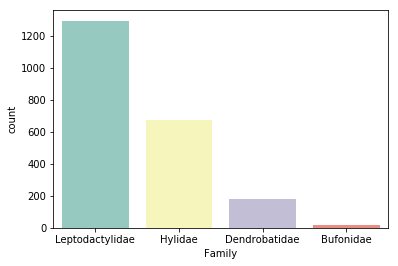

In [232]:
ax = sns.countplot(x="Family", data=testy_family, palette="Set3")

In [170]:
from imblearn.over_sampling import SMOTE

### Number of records in each class of the label family before SMOTE

In [723]:
testy_family.groupby('Family').size()

Family
Bufonidae            24
Dendrobatidae       172
Hylidae             657
Leptodactylidae    1306
dtype: int64

In [724]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(trainX, trainy_family)
y_train_res = pd.DataFrame(y_train_res)
X_train_res = pd.DataFrame(X_train_res)
y_train_res.columns = testy_family.columns
X_train_res.columns = trainX.columns

### Number of records in each class of the label family after SMOTE

In [725]:
y_train_res.groupby('Family').size()

Family
Bufonidae          3114
Dendrobatidae      3114
Hylidae            3114
Leptodactylidae    3114
dtype: int64

In [726]:
y_train_res.head()

,Family
0,Leptodactylidae
1,Leptodactylidae
2,Leptodactylidae
3,Leptodactylidae
4,Leptodactylidae


In [727]:
X_train_res.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.424762,0.356837,0.592257,0.237433,0.076765,-0.103766,0.005138,0.315383,0.037768,...,0.390007,-0.072742,-0.241846,0.081086,0.144094,0.022808,-0.133471,-0.129910,0.042323,0.191483
1,1.0,0.493054,0.613072,0.533885,-0.186222,0.016594,0.394709,0.010818,-0.297585,0.100912,...,-0.066861,0.229043,-0.010037,-0.158897,0.058525,0.079555,-0.120030,-0.030636,0.054704,-0.031715
2,1.0,0.442064,0.293245,0.726089,0.254030,0.178914,-0.018987,0.023813,0.196568,0.072080,...,0.205802,-0.318534,-0.054271,0.315413,0.078837,-0.220545,-0.184062,-0.169232,0.083541,0.176017
3,1.0,0.361556,0.227157,0.537477,0.201919,-0.025676,-0.174175,0.028057,0.304244,0.049381,...,0.344385,-0.114047,-0.301647,0.038174,0.183188,0.087206,-0.066263,-0.164585,0.101756,0.257386
4,1.0,0.392600,0.331238,0.544056,0.144553,0.062954,-0.067258,-0.060673,0.213612,0.155041,...,0.374332,0.018702,-0.252099,0.082721,0.246351,-0.030860,-0.079079,-0.038339,-0.014148,0.128197


### After SMOTE, class imbalance is no more

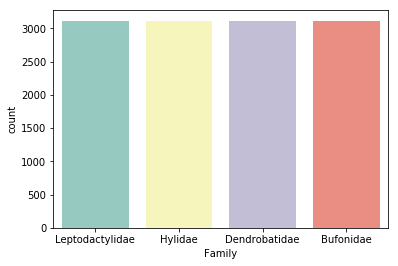

In [728]:
ax = sns.countplot(x="Family", data=y_train_res, palette="Set3")

# L-1 Penalized after SMOTE

In [729]:
warnings.filterwarnings('ignore')
l1_species.fit(X_train_res,y_train_res)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [730]:
ypred_smote_family = l1_species.predict(testX)

In [731]:
accuracy_score(ypred_smote_family,testy_family)

0.9272811486799444

In [732]:
hamming_loss(ypred_smote_family,testy_family)

0.07271885132005558

In [733]:
confusion_matrix(ypred_smote_family,testy_family)

array([[  20,    0,   16,   11],
       [   0,  169,   31,   16],
       [   1,    0,  561,   27],
       [   3,    3,   49, 1252]])

In [734]:
l1_species.score(X_train_res,y_train_res)

0.9508670520231214

In [735]:
l1_species.score(testX,testy_family)

0.9272811486799444

# Accuracy after SMOTE for Family : 0.9212598425196851
# Hamming Loss after SMOTE for Family : 0.07271885132005558

# Label - Genus

## Visualizing Class Imbalance

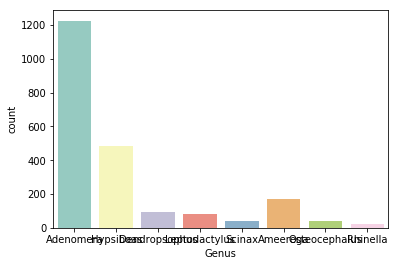

In [681]:
ax = sns.countplot(x="Genus", data=testy_genus, palette="Set3")

In [682]:
from imblearn.over_sampling import SMOTE

### Number of records in each class of the label genus before SMOTE

In [684]:
testy_genus.groupby('Genus').size()

Genus
Adenomera        1226
Ameerega          172
Dendropsophus      95
Hypsiboas         482
Leptodactylus      80
Osteocephalus      40
Rhinella           24
Scinax             40
dtype: int64

In [685]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(trainX_std, trainy_genus)
y_train_res = pd.DataFrame(y_train_res)
X_train_res = pd.DataFrame(X_train_res)
y_train_res.columns = testy_genus.columns
X_train_res.columns = trainX_std.columns

### Number of records in each class of the label genus after SMOTE

In [686]:
y_train_res.groupby('Genus').size()

Genus
Adenomera        2924
Ameerega         2924
Dendropsophus    2924
Hypsiboas        2924
Leptodactylus    2924
Osteocephalus    2924
Rhinella         2924
Scinax           2924
dtype: int64

In [687]:
y_train_res.head()

,Genus
0,Adenomera
1,Adenomera
2,Adenomera
3,Adenomera
4,Adenomera


In [688]:
X_train_res.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146813,0.464501,0.166884,0.906004,0.684801,-0.176357,-0.603228,0.040391,1.044341,-0.135276,...,1.159170,-0.214903,-0.752884,0.312310,0.396251,0.179691,-1.007562,-0.812855,0.053355,0.838804
1,0.146813,0.776325,1.135704,0.543184,-1.927495,-0.675157,2.303767,0.089337,-2.367328,0.361494,...,-1.045212,1.758113,0.480210,-1.674523,-0.221288,0.846306,-0.845583,0.233268,0.210283,-0.969427
2,0.146813,0.543506,-0.073557,1.737851,0.787145,0.670428,-0.108812,0.201315,0.383035,0.134667,...,0.270384,-1.821842,0.244911,2.252322,-0.074695,-2.679009,-1.617218,-1.227229,0.575769,0.713506
3,0.146813,0.175900,-0.323433,0.565510,0.465821,-1.025557,-1.013838,0.237888,0.982340,-0.043917,...,0.939043,-0.484945,-1.070988,-0.042962,0.678390,0.936176,-0.197656,-1.178255,0.806631,1.372715
4,0.146813,0.317652,0.070094,0.606400,0.112099,-0.290844,-0.390318,-0.526703,0.477900,0.787346,...,1.083537,0.382944,-0.807420,0.325849,1.134225,-0.450752,-0.352090,0.152091,-0.662390,0.326096


### After SMOTE, class imbalance is no more

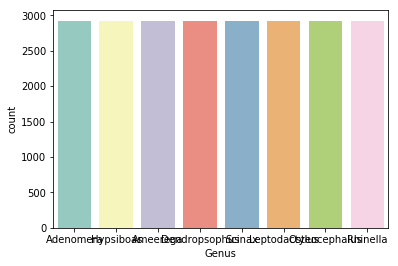

In [689]:
ax = sns.countplot(x="Genus", data=y_train_res, palette="Set3")

# L-1 Penalized after SMOTE

In [690]:
warnings.filterwarnings('ignore')
l1_species.fit(X_train_res,y_train_res)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [691]:
ypred_smote_genus = l1_species.predict(testX_std)

In [692]:
accuracy_score(ypred_smote_genus,testy_genus)

0.9245020842982863

In [713]:
hamming_loss(ypred_smote_genus,testy_genus)

0.07549791570171376

In [693]:
confusion_matrix(ypred_smote_genus,testy_genus)

array([[1137,    2,    2,   13,    0,    0,    3,    0],
       [  18,  164,    3,    0,    0,    0,    0,    0],
       [  43,    6,   84,    1,    0,    0,    0,    0],
       [   6,    0,    2,  441,    4,    1,    1,    0],
       [   0,    0,    2,    7,   74,    1,    0,    0],
       [  14,    0,    0,   19,    0,   37,    0,    0],
       [   6,    0,    2,    1,    2,    1,   20,    1],
       [   2,    0,    0,    0,    0,    0,    0,   39]])

In [694]:
l1_species.score(X_train_res,y_train_res)

0.958874829001368

In [695]:
l1_species.score(testX_std,testy_genus)

0.9245020842982863

# Accuracy after SMOTE for Genus : 0.9245020842982863
# Hamming Loss after SMOTE for Genus : 0.07549791570171376

# Label - Species

## Visualizing Class Imbalance

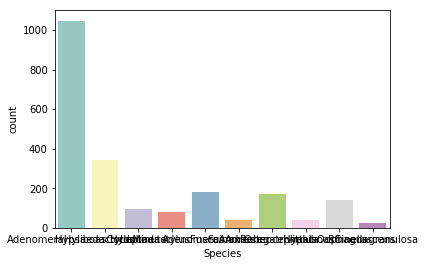

In [696]:
ax = sns.countplot(x="Species", data=testy_species, palette="Set3")

In [697]:
from imblearn.over_sampling import SMOTE

### Number of records in each class of the label species before SMOTE

In [698]:
testy_species.groupby('Species').size()

Species
AdenomeraAndre             179
AdenomeraHylaedactylus    1047
Ameeregatrivittata         172
HylaMinuta                  95
HypsiboasCinerascens       140
HypsiboasCordobae          342
LeptodactylusFuscus         80
OsteocephalusOophagus       40
Rhinellagranulosa           24
ScinaxRuber                 40
dtype: int64

In [699]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(trainX_std, trainy_species)
y_train_res = pd.DataFrame(y_train_res)
X_train_res = pd.DataFrame(X_train_res)
y_train_res.columns = testy_species.columns
X_train_res.columns = trainX_std.columns

### Number of records in each class of the label species after SMOTE

In [700]:
y_train_res.groupby('Species').size()

Species
AdenomeraAndre            2431
AdenomeraHylaedactylus    2431
Ameeregatrivittata        2431
HylaMinuta                2431
HypsiboasCinerascens      2431
HypsiboasCordobae         2431
LeptodactylusFuscus       2431
OsteocephalusOophagus     2431
Rhinellagranulosa         2431
ScinaxRuber               2431
dtype: int64

In [701]:
y_train_res.head()

,Species
0,AdenomeraHylaedactylus
1,AdenomeraAndre
2,AdenomeraHylaedactylus
3,AdenomeraHylaedactylus
4,AdenomeraHylaedactylus


In [703]:
X_train_res.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146813,0.464501,0.166884,0.906004,0.684801,-0.176357,-0.603228,0.040391,1.044341,-0.135276,...,1.159170,-0.214903,-0.752884,0.312310,0.396251,0.179691,-1.007562,-0.812855,0.053355,0.838804
1,0.146813,0.776325,1.135704,0.543184,-1.927495,-0.675157,2.303767,0.089337,-2.367328,0.361494,...,-1.045212,1.758113,0.480210,-1.674523,-0.221288,0.846306,-0.845583,0.233268,0.210283,-0.969427
2,0.146813,0.543506,-0.073557,1.737851,0.787145,0.670428,-0.108812,0.201315,0.383035,0.134667,...,0.270384,-1.821842,0.244911,2.252322,-0.074695,-2.679009,-1.617218,-1.227229,0.575769,0.713506
3,0.146813,0.175900,-0.323433,0.565510,0.465821,-1.025557,-1.013838,0.237888,0.982340,-0.043917,...,0.939043,-0.484945,-1.070988,-0.042962,0.678390,0.936176,-0.197656,-1.178255,0.806631,1.372715
4,0.146813,0.317652,0.070094,0.606400,0.112099,-0.290844,-0.390318,-0.526703,0.477900,0.787346,...,1.083537,0.382944,-0.807420,0.325849,1.134225,-0.450752,-0.352090,0.152091,-0.662390,0.326096


### After SMOTE, class imbalance is no more

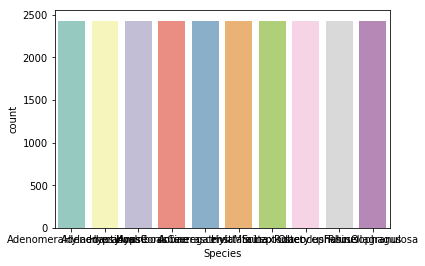

In [704]:
ax = sns.countplot(x="Species", data=y_train_res, palette="Set3")

# L-1 Penalized after SMOTE

In [705]:
warnings.filterwarnings('ignore')
l1_species.fit(X_train_res,y_train_res)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0)

In [706]:
ypred_smote_species = l1_species.predict(testX_std)

In [707]:
accuracy_score(ypred_smote_species,testy_species)

0.953219082908754

In [712]:
hamming_loss(ypred_smote_species,testy_species)

0.04678091709124595

# Confisuion Matrix 

In [708]:
confusion_matrix(ypred_smote_species,testy_species)

array([[ 165,    0,    6,    3,    2,    0,    0,    0,    1,    0],
       [   0, 1039,    0,    1,    0,    3,    1,    0,    0,    0],
       [   1,    0,  158,    7,    0,    0,    0,    0,    0,    0],
       [   9,    1,    5,   78,    0,    1,    1,    0,    0,    0],
       [   0,    2,    0,    0,  132,    7,    1,    1,    0,    1],
       [   0,    0,    2,    1,    2,  322,    2,    3,    1,    0],
       [   0,    0,    0,    2,    1,    7,   73,    1,    3,    0],
       [   0,    0,    0,    0,    2,    1,    0,   34,    0,    0],
       [   3,    1,    1,    3,    1,    0,    2,    1,   19,    1],
       [   1,    4,    0,    0,    0,    1,    0,    0,    0,   38]])

In [709]:
l1_species.score(X_train_res,y_train_res)

0.955779514603044

In [711]:
l1_species.score(testX_std,testy_species)

0.953219082908754

# Accuracy for Species after SMOTE : 0.953219082908754
# Hamming Loss after SMOTE : 0.04678091709124595

# 2. K-Means Clustering - Monte-Carlo Simulation

# X for K-means, No test and train data

In [242]:
X = df.iloc[:,:22]

In [243]:
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.295123,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.236428,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.250981,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.282427,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.328433,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025


# Finding Best k using CH method

In [440]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import calinski_harabaz_score

In [441]:
ch_score = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    ch_score.append(calinski_harabaz_score(X,kmeans.labels_))

([<matplotlib.axis.XTick at 0x114f40198>,
 <a list of 20 Text xticklabel objects>)

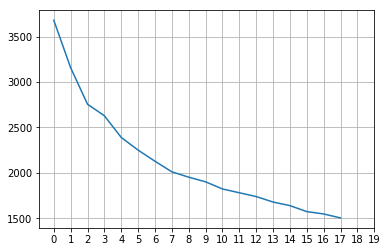

In [442]:
fig, ax = plt.subplots()
plt.plot(ch_score)
ax.grid()
xint = range(0,20)

plt.xticks(xint)

In [443]:
ch_score.index(max(ch_score))

0

### By CH method, best k is 2

In [273]:
mse_score = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    mse = 0;
    for i in range(X.shape[0]):
        mse += mean_squared_error(X.iloc[i,:],kmeans.cluster_centers_[kmeans.labels_[i]])
    mse_score.append(mse)


([<matplotlib.axis.XTick at 0x11832f630>,
 <a list of 20 Text xticklabel objects>)

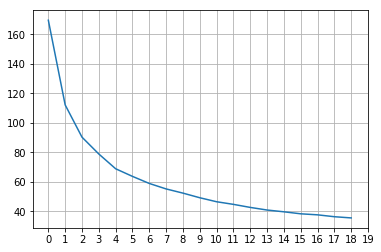

In [282]:
#kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
fig, ax = plt.subplots()
plt.plot(mse_score)
ax.grid()
xint = range(0,20)

plt.xticks(xint)

In [264]:
X.shape

(7195, 22)

In [271]:
mean_squared_error(X.iloc[0,:],kmeans.cluster_centers_[kmeans.labels_[0]])

0.024380084772947844

### By MSE, Elbow method, best k is 4

In [455]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
    sil_score.append(silhouette_score(X,kmeans.labels_))

([<matplotlib.axis.XTick at 0x117d0bcf8>,
 <a list of 20 Text xticklabel objects>)

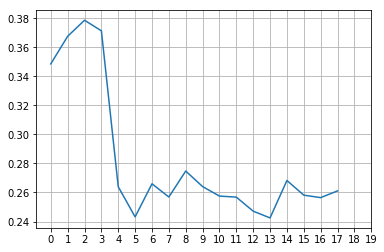

In [465]:
fig, ax = plt.subplots()
plt.plot(sil_score)
ax.grid()
xint = range(0,20)

plt.xticks(xint)

In [448]:
from gap_statistic import OptimalK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [302]:
optimalK = OptimalK(parallel_backend='rust')
optimalK

OptimalK(n_jobs=4, parallel_backend="rust")

## 2.a K=4 based on Silhouttes Method and MSE - Elbow Method

In [304]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [308]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [306]:
kmeans.cluster_centers_

array([[ 0.99804037,  0.27922781,  0.21161981,  0.55347062,  0.19119072,
         0.02838748, -0.11590667,  0.04503526,  0.26035194,  0.0347726 ,
        -0.26495912,  0.09691687,  0.31690639, -0.11319282, -0.25024471,
         0.09142774,  0.19732458,  0.01046518, -0.09948656, -0.11908491,
         0.05946363,  0.18918012],
       [ 1.        ,  0.21867703,  0.00257307,  0.26954415,  0.26317012,
         0.18782419,  0.04176643, -0.07732317, -0.0213772 ,  0.14354016,
         0.06435585, -0.16139537, -0.11617529,  0.14656244,  0.14872189,
        -0.04253441, -0.10024312, -0.02899254,  0.00316149,  0.01532946,
         0.02775766, -0.00258331],
       [ 0.91980546,  0.68834129,  0.77266904,  0.38660762, -0.04865725,
         0.20261349,  0.03308578,  0.06455053,  0.16737293, -0.1414455 ,
        -0.03803148,  0.28940023, -0.07620172, -0.18366493,  0.17219831,
         0.08926362, -0.10003921, -0.00545959,  0.02776193,  0.05214105,
         0.02005484, -0.09364866],
       [ 0.99148837

In [ ]:
abc =  df['Family'][kmeans.labels_==0]

# 2.b Finding the majority triplet without 50 iterations

In [403]:
for i in range(0,4):
    abc =  df['Family'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Family']
    c  = abc.groupby('Family').size()
    c.idxmax()
    print('Majority Family in Cluster',i,'is:', c.idxmax())
    abc =  df['Genus'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Genus']
    c  = abc.groupby('Genus').size()
    c.idxmax()
    print('Majority Genus in Cluster',i,'is:', c.idxmax())
    abc =  df['Species'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Species']
    c  = abc.groupby('Species').size()
    c.idxmax()
    print('Majority Species in Cluster',i,'is:', c.idxmax())

Majority Family in Cluster 0 is: Leptodactylidae
Majority Genus in Cluster 0 is: Adenomera
Majority Species in Cluster 0 is: AdenomeraHylaedactylus
Majority Family in Cluster 1 is: Dendrobatidae
Majority Genus in Cluster 1 is: Ameerega
Majority Species in Cluster 1 is: Ameeregatrivittata
Majority Family in Cluster 2 is: Hylidae
Majority Genus in Cluster 2 is: Hypsiboas
Majority Species in Cluster 2 is: HypsiboasCinerascens
Majority Family in Cluster 3 is: Hylidae
Majority Genus in Cluster 3 is: Hypsiboas
Majority Species in Cluster 3 is: HypsiboasCordobae


In [404]:
abc =  df['Family'][kmeans.labels_==i]
abc = pd.DataFrame(abc)
abc.columns = ['Family']
abc.groupby('Family').size()

Family
Bufonidae            66
Dendrobatidae        39
Hylidae            1248
Leptodactylidae     630
dtype: int64

In [410]:
import scipy
scipy.spatial.distance.hamming(cl, abc)

0.37065052950075644

# 2.c Finding the Hamming Scores

In [414]:
for i in range(0,4):
    abc =  df['Family'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Family']
    c  = abc.groupby('Family').size()
    c.idxmax()
    cl = [c.idxmax()] * abc.size
    print('Hamming Distance of Family in Cluster',i,'is:', scipy.spatial.distance.hamming(cl, abc))
    abc =  df['Genus'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Genus']
    c  = abc.groupby('Genus').size()
    c.idxmax()
    cl = [c.idxmax()] * abc.size
    print('Hamming Distance of Genus in Cluster',i,'is:', scipy.spatial.distance.hamming(cl, abc))
    abc =  df['Species'][kmeans.labels_==i]
    abc = pd.DataFrame(abc)
    abc.columns = ['Species']
    c  = abc.groupby('Species').size()
    c.idxmax()
    cl = [c.idxmax()] * abc.size
    print('Hamming Distance of Species in Cluster',i,'is:', scipy.spatial.distance.hamming(cl, abc))

Hamming Distance of Family in Cluster 0 is: 0.028307174887892375
Hamming Distance of Genus in Cluster 0 is: 0.02858744394618834
Hamming Distance of Species in Cluster 0 is: 0.02858744394618834
Hamming Distance of Family in Cluster 1 is: 0.5135396518375241
Hamming Distance of Genus in Cluster 1 is: 0.5135396518375241
Hamming Distance of Species in Cluster 1 is: 0.5135396518375241
Hamming Distance of Family in Cluster 2 is: 0.03770491803278689
Hamming Distance of Genus in Cluster 2 is: 0.11475409836065574
Hamming Distance of Species in Cluster 2 is: 0.25901639344262295
Hamming Distance of Family in Cluster 3 is: 0.37065052950075644
Hamming Distance of Genus in Cluster 3 is: 0.475542107917297
Hamming Distance of Species in Cluster 3 is: 0.4856278366111952


# 2.a. Finding best k by running 50 iterations - Monte Carlo Simulation

Loop: 0
Max Silhoutte Vaue is for Cluster: 4
Loop: 1
Max Silhoutte Vaue is for Cluster: 4
Loop: 2
Max Silhoutte Vaue is for Cluster: 4
Loop: 3
Max Silhoutte Vaue is for Cluster: 5
Loop: 4
Max Silhoutte Vaue is for Cluster: 4
Loop: 5
Max Silhoutte Vaue is for Cluster: 4
Loop: 6
Max Silhoutte Vaue is for Cluster: 4
Loop: 7
Max Silhoutte Vaue is for Cluster: 4
Loop: 8
Max Silhoutte Vaue is for Cluster: 4
Loop: 9
Max Silhoutte Vaue is for Cluster: 4
Loop: 10
Max Silhoutte Vaue is for Cluster: 5
Loop: 11
Max Silhoutte Vaue is for Cluster: 4
Loop: 12
Max Silhoutte Vaue is for Cluster: 4
Loop: 13
Max Silhoutte Vaue is for Cluster: 4
Loop: 14
Max Silhoutte Vaue is for Cluster: 4
Loop: 15
Max Silhoutte Vaue is for Cluster: 4
Loop: 16
Max Silhoutte Vaue is for Cluster: 4
Loop: 17
Max Silhoutte Vaue is for Cluster: 4
Loop: 18
Max Silhoutte Vaue is for Cluster: 4
Loop: 19
Max Silhoutte Vaue is for Cluster: 4
Loop: 20
Max Silhoutte Vaue is for Cluster: 4
Loop: 21
Max Silhoutte Vaue is for Cluster: 

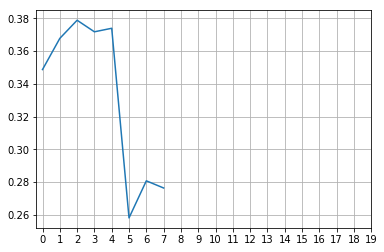

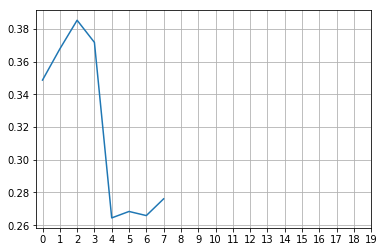

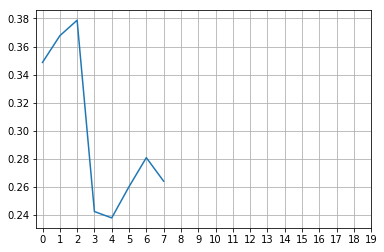

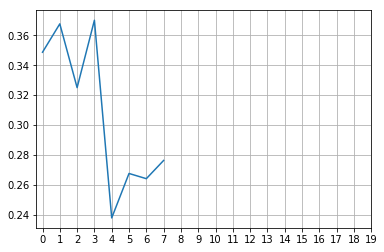

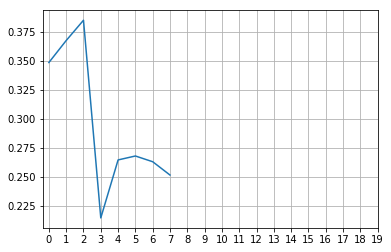

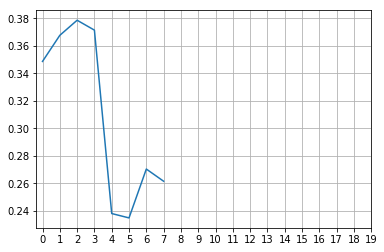

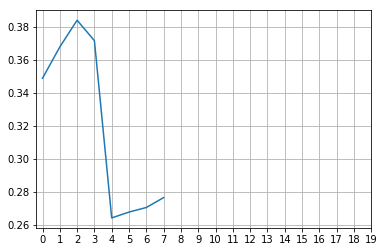

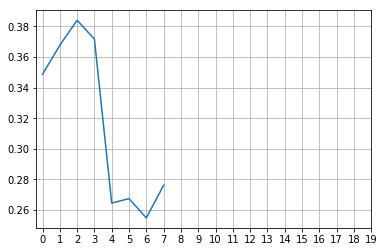

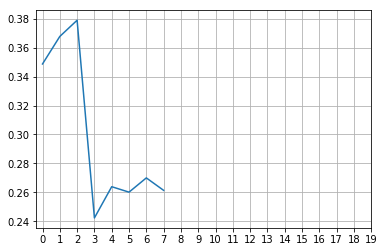

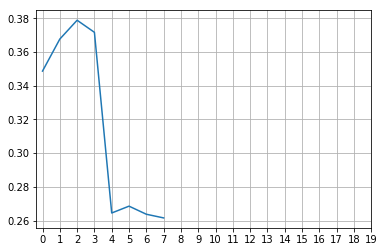

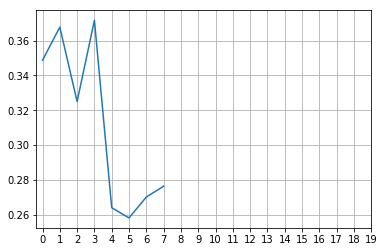

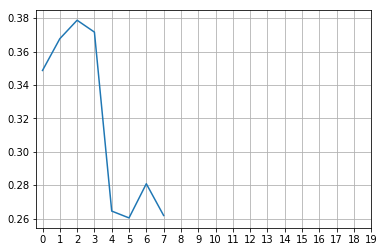

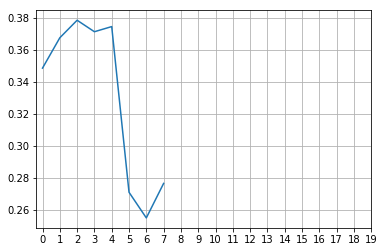

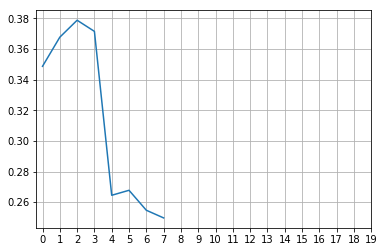

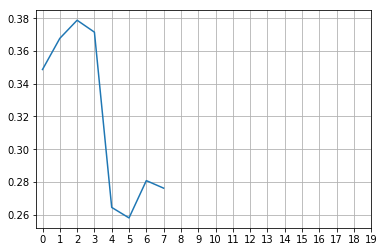

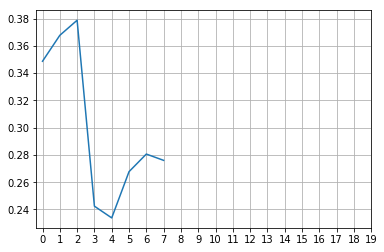

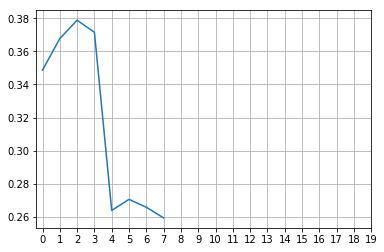

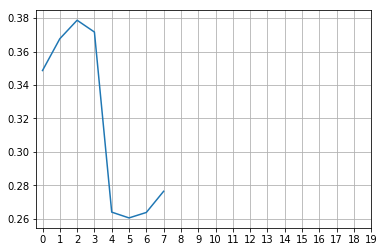

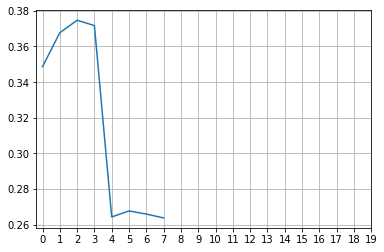

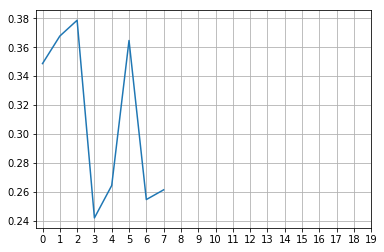

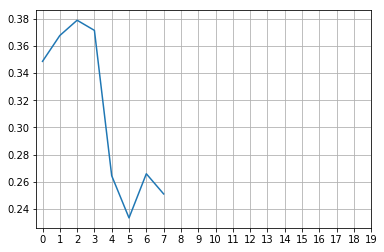

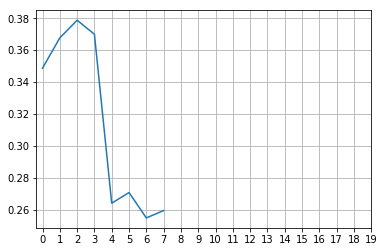

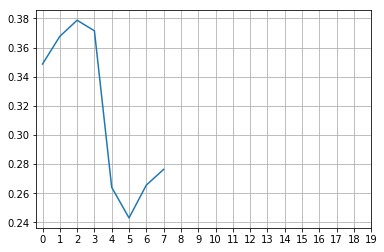

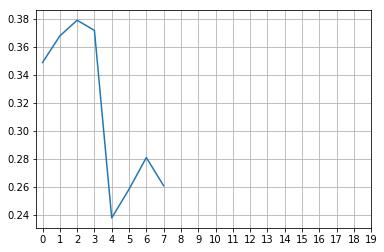

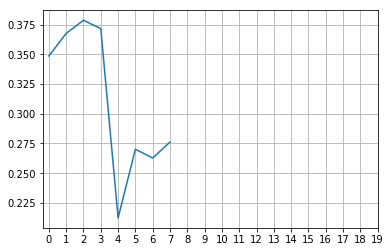

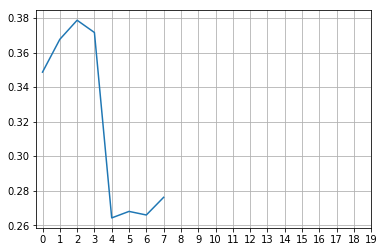

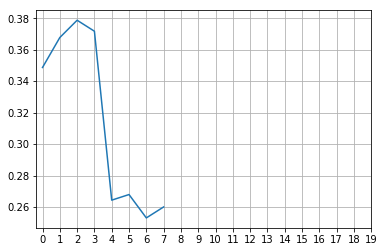

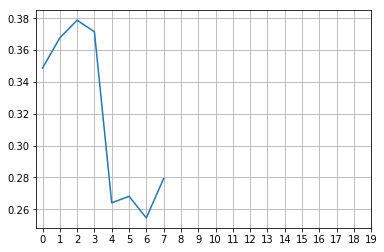

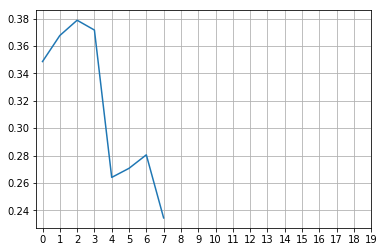

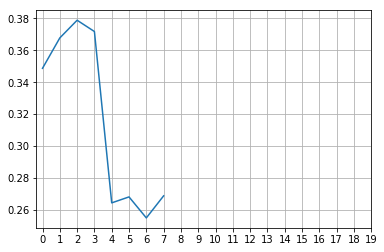

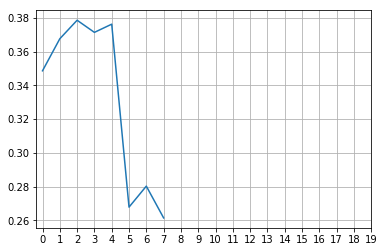

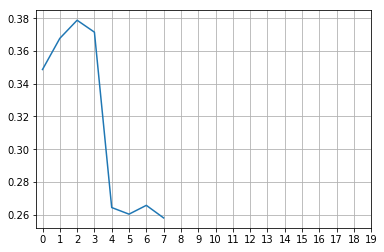

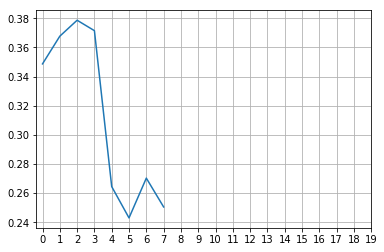

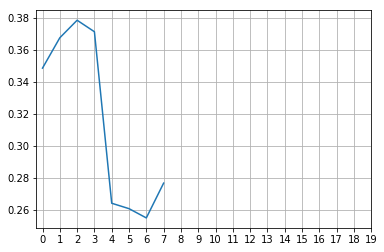

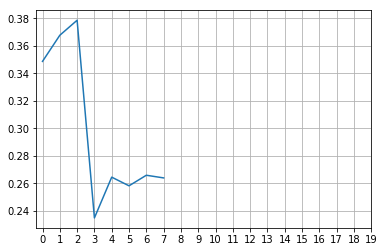

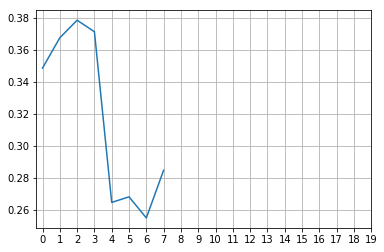

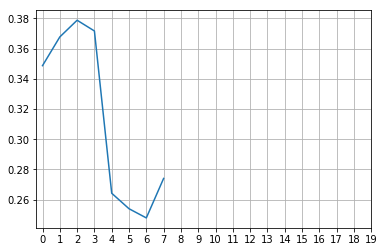

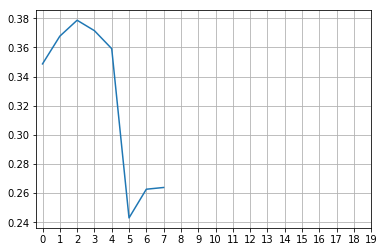

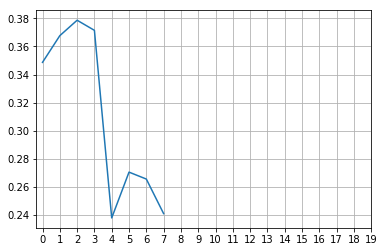

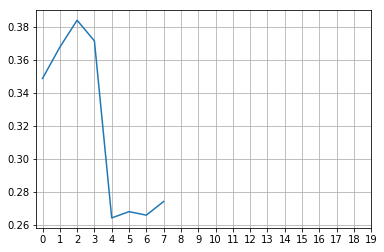

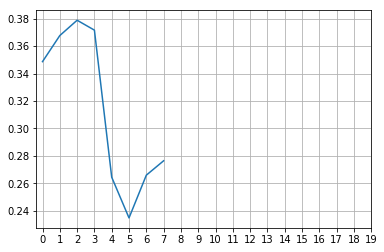

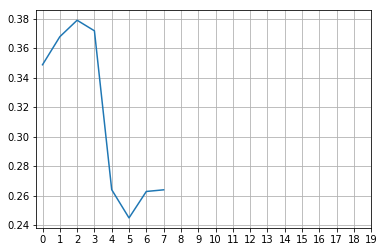

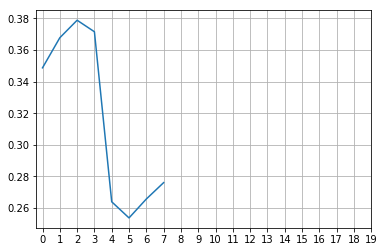

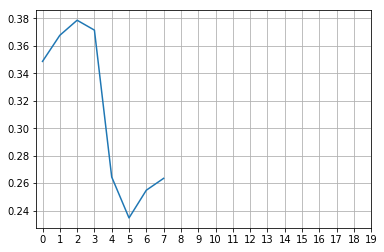

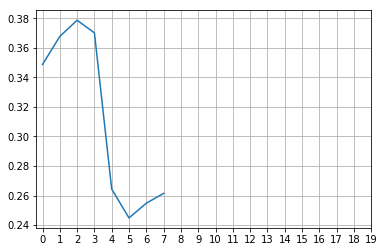

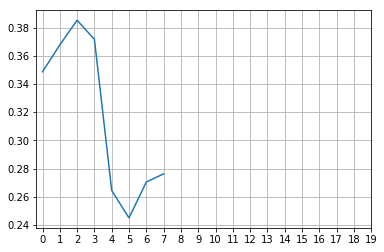

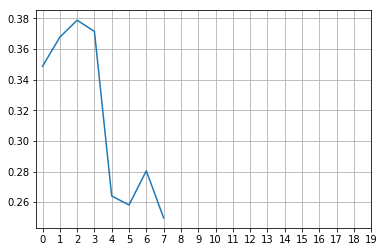

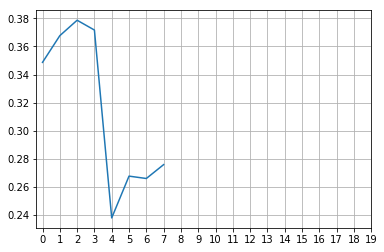

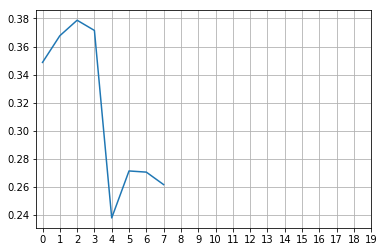

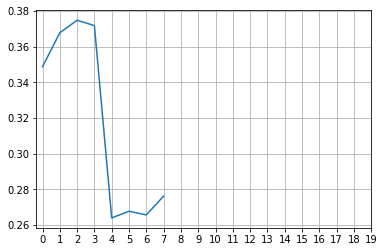

In [672]:
from sklearn.metrics import silhouette_samples, silhouette_score
loopSilScore = [];
for loop in range(0,50):
    print("Loop:",loop);
    sil_score = []
    for k in range(2,10):
        kmeans = KMeans(init='random', n_clusters=k).fit(X)
        sil_score.append(silhouette_score(X,kmeans.labels_))
    print("Max Silhoutte Vaue is for Cluster:",sil_score.index(max(sil_score))+2)
    loopSilScore.append(sil_score.index(max(sil_score))+2)
    fig, ax = plt.subplots()
    plt.plot(sil_score)
    ax.grid()
    xint = range(0,20)
    plt.xticks(xint)

In [675]:
print("Average of all the k values:",np.mean(loopSilScore))
print("Different K values in 50 iterations:",np.unique(loopSilScore))
#print(len(loopSilScore))

Average of all the k values: 4.04
Different K values in 50 iterations: [4 5]


## From the 50 iterations, avg k value is 4.04, hence the optimal k value is 4

# 2.b and 2.c  Finding majority triplet and hamming score using 50 iterations

In [483]:
avgFamilyHamming = []
avgSpeciesHamming = []
avgGenusHamming = []

for loop in range(0,50):
    print(loop)
    K=loopSilScore[loop];
    kmeans = KMeans(n_clusters=K, init = 'random').fit(X)
    sumFamily = 0;
    sumGenus = 0;
    sumSpecies = 0;
    for i in range(0,K):
    
        abc =  df['Family'][kmeans.labels_==i]
        abc = pd.DataFrame(abc)
        abc.columns = ['Family']
        c  = abc.groupby('Family').size()
        c.idxmax()
        cl = [c.idxmax()] * abc.size

        sumFamily += scipy.spatial.distance.hamming(cl, abc)

        abc =  df['Genus'][kmeans.labels_==i]
        abc = pd.DataFrame(abc)
        abc.columns = ['Genus']
        c  = abc.groupby('Genus').size()
        c.idxmax()
        cl = [c.idxmax()] * abc.size
        
        sumGenus += scipy.spatial.distance.hamming(cl, abc)
        
        abc =  df['Species'][kmeans.labels_==i]
        abc = pd.DataFrame(abc)
        abc.columns = ['Species']
        c  = abc.groupby('Species').size()
        c.idxmax()
        cl = [c.idxmax()] * abc.size
        
        sumSpecies += scipy.spatial.distance.hamming(cl, abc)
    
    avgFamilyHamming.append(sumFamily/K)
    avgGenusHamming.append(sumGenus/K)
    avgSpeciesHamming.append(sumSpecies/K)

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [487]:
print('Family avg hamming score= ',np.mean(avgFamilyHamming))
print('Genus avg hamming score= ',np.mean(avgGenusHamming))
print('Species avg hamming score= ',np.mean(avgSpeciesHamming))

Family avg hamming score=  0.2243857638954558
Genus avg hamming score=  0.2934517254299575
Species avg hamming score=  0.34101208912392017


In [488]:
print('Family STD hamming score= ',np.std(avgFamilyHamming))
print('Genus STD hamming score= ',np.std(avgGenusHamming))
print('Species STD hamming score= ',np.std(avgSpeciesHamming))

Family STD hamming score=  0.030718489786955086
Genus STD hamming score=  0.03139171712492154
Species STD hamming score=  0.04703670051588715


In [679]:
Mean_HS = (np.mean(avgFamilyHamming)+np.mean(avgGenusHamming)+np.mean(avgSpeciesHamming))/3
print("Average of 50 Hamming Scores:",Mean_HS)

Average of 50 Hamming Scores: 0.2862831928164445


In [680]:
STD_HS = (np.std(avgFamilyHamming)+np.std(avgGenusHamming)+np.std(avgSpeciesHamming))/3
print("Standard Deviation of 50 Hamming Scores:",STD_HS)

Standard Deviation of 50 Hamming Scores: 0.03638230247592126


# Average of 50 Hamming Scores for the whole model is 0.2862831928164445
# Standard Deviation of 50 Hamming Scores is 0.03638230247592126